<a href="https://colab.research.google.com/github/anmolkumar0717/pyTorch/blob/main/Excercise_01_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import torch
import matplotlib.pyplot as plt


# Excercise

##1.Create a straight line dataset using the linear regression formula (weight * X + bias).
**Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.

**Split the data into 80% training, 20% testing.

**Plot the training and testing data so it becomes visual.

In [43]:
#1.creating a known data

weight=0.8
bias=0.9

start=0
stop=1
step=0.01

X=torch.arange(start,stop,step).unsqueeze(dim=1)
Y= weight * X + bias


In [44]:
split=int(0.8*len(X))
#dividing the testing and training data by 80 and 20

X_test,Y_test=X[split:],Y[split:]
X_train,Y_train=X[:split],Y[:split]



In [45]:
# Creating a function to plot the graph between X_train with Y_train as well as X_test with Y_test
def plot_prediction(train_data=X_train,
                    train_label=Y_train,
                    test_data=X_test,
                    test_label=Y_test,
                    prediction=None
                    ):
  plt.figure(figsize=(7,10))
  plt.scatter(train_data,train_label,c="b",s=3,label="Training data")

  plt.scatter(test_data,test_label,c="g",s=3,label="Testing data")

  if prediction is not None:
    plt.scatter(test_data,prediction,c="r",s=3,label="Ptrediction")

  plt.legend(prop={"size":14})



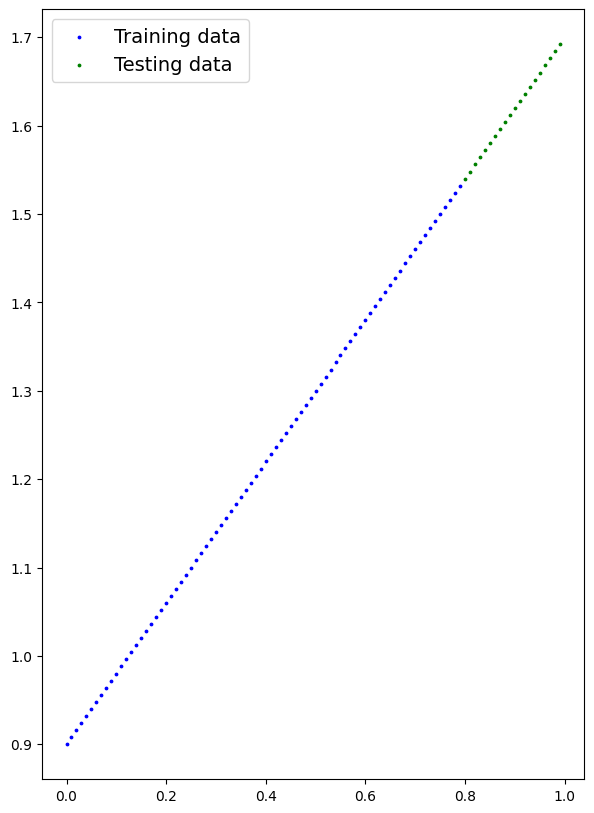

In [46]:
plot_prediction()

#Build a PyTorch model by subclassing nn.Module.
Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.

Implement the forward() method to compute the linear regression function you used to create the dataset in 1.

Once you've constructed the model, make an instance of it and check its state_dict().

##Note: If you'd like to use nn.Linear() instead of nn.Parameter() you can.

In [47]:
# Creating the linear regression model using the nn module
import torch.nn as nn


class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,
                                         dtype=torch.float,
                                         requires_grad=True))

    self.bias=nn.Parameter(torch.randn(1,
                                       dtype=torch.float,
                                       requires_grad=True))

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.weight * x + self.bias



In [48]:
model_1=LinearRegression()
model_1.state_dict()

OrderedDict([('weight', tensor([-0.0361])), ('bias', tensor([0.1683]))])

In [49]:
#creating the loss function as well as optimizer

loss_fn=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.01)


In [52]:
#creating a training and testing loop

#setting the EPOCHS ready

epochs=200

for epoch in range(epochs):
  model_1.train()
  #1.calling the forward function
  Y_pred=model_1(X_train)

  #2.calculate the loss
  loss=loss_fn(Y_pred,Y_train)

  #3.Zero grad
  optimizer.zero_grad()

  #4.Backpropagation
  loss.backward()

  #5.step up the optimizer
  optimizer.step()

  #testing loop
  model_1.eval()

  #1.call the forward

  with torch.inference_mode():
    test_pred=model_1(X_test)

  #2.loss function

  test_loss=loss_fn(test_pred,Y_test)




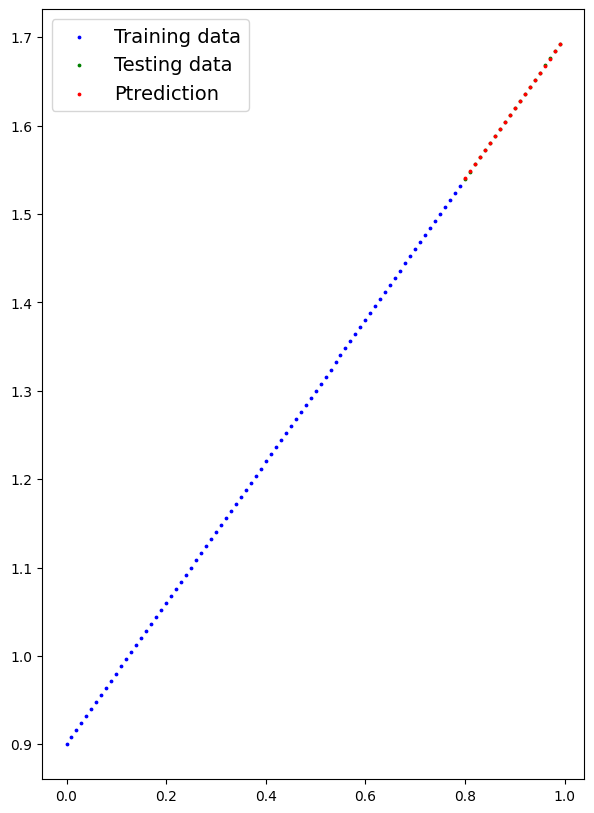

In [53]:
with torch.inference_mode():
  Y_preds=model_1(X_test)

plot_prediction(prediction=Y_preds)